In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime 
%matplotlib inline

In [2]:
weather = pd.read_csv('day.csv', parse_dates=['dteday'])
weather.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
bike_share = pd.read_csv('2011-Q4-cabi-trip-history-data.csv', parse_dates=['Start date', 'End date'])
bike_share.head()

,Duration,Start date,End date,Start station,End station,Bike#,Member Type
0,0h 7min. 48sec.,2011-12-31 23:55:00,2012-01-01 00:03:00,18th & M St NW (31221),10th & U St NW (31111),W01319,Registered
1,0h 34min. 20sec.,2011-12-31 23:55:00,2012-01-01 00:29:00,21st & I St NW (31205),New York Ave & 15th St NW (31222),W00042,Registered
2,0h 4min. 21sec.,2011-12-31 23:47:00,2011-12-31 23:51:00,Lamont & Mt Pleasant NW (31107),Park Rd & Holmead Pl NW (31602),W00998,Registered
3,0h 6min. 27sec.,2011-12-31 23:46:00,2011-12-31 23:53:00,Convention Center / 7th & M St NW (31223),15th & P St NW (31201),W01262,Registered
4,0h 5min. 0sec.,2011-12-31 23:41:00,2011-12-31 23:46:00,15th & P St NW (31201),17th & Corcoran St NW (31214),W01459,Registered


In [4]:
bike_share.drop('Duration', 1, inplace=True)

In [5]:
bike_share.drop('Bike#', 1, inplace=True)

In [6]:
bike_share['start_date_short'] = pd.to_datetime(bike_share['Start date'].dt.strftime('%Y-%m-%d'))

In [7]:
bike_share['end_date_short'] = pd.to_datetime(bike_share['End date'].dt.strftime('%Y-%m-%d'))

In [8]:
bike_share['time_diff'] = bike_share['End date'] - bike_share['Start date']
bike_share['time_diff'] = bike_share['time_diff'].astype('timedelta64[m]')

In [9]:
bike_share.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312346 entries, 0 to 312345
Data columns (total 8 columns):
Start date          312346 non-null datetime64[ns]
End date            312346 non-null datetime64[ns]
Start station       312346 non-null object
End station         312328 non-null object
Member Type         312346 non-null object
start_date_short    312346 non-null datetime64[ns]
end_date_short      312346 non-null datetime64[ns]
time_diff           312346 non-null float64
dtypes: datetime64[ns](4), float64(1), object(3)
memory usage: 19.1+ MB


In [10]:
weather.drop('instant', 1, inplace=True)

In [11]:
weather.drop('yr', 1, inplace=True)

In [12]:
weather.drop('casual', 1, inplace=True)

In [13]:
weather.drop('registered', 1, inplace=True)

In [14]:
weather.drop('cnt', 1, inplace=True)

In [15]:
merged_data = pd.merge(bike_share, weather, how='left', left_on='start_date_short', right_on='dteday')

In [16]:
merged_data.head()

,Start date,End date,Start station,End station,Member Type,start_date_short,end_date_short,time_diff,dteday,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
0,2011-12-31 23:55:00,2012-01-01 00:03:00,18th & M St NW (31221),10th & U St NW (31111),Registered,2011-12-31,2012-01-01,8.0,2011-12-31,1,12,0,6,0,1,0.41,0.414121,0.615833,0.220154
1,2011-12-31 23:55:00,2012-01-01 00:29:00,21st & I St NW (31205),New York Ave & 15th St NW (31222),Registered,2011-12-31,2012-01-01,34.0,2011-12-31,1,12,0,6,0,1,0.41,0.414121,0.615833,0.220154
2,2011-12-31 23:47:00,2011-12-31 23:51:00,Lamont & Mt Pleasant NW (31107),Park Rd & Holmead Pl NW (31602),Registered,2011-12-31,2011-12-31,4.0,2011-12-31,1,12,0,6,0,1,0.41,0.414121,0.615833,0.220154
3,2011-12-31 23:46:00,2011-12-31 23:53:00,Convention Center / 7th & M St NW (31223),15th & P St NW (31201),Registered,2011-12-31,2011-12-31,7.0,2011-12-31,1,12,0,6,0,1,0.41,0.414121,0.615833,0.220154
4,2011-12-31 23:41:00,2011-12-31 23:46:00,15th & P St NW (31201),17th & Corcoran St NW (31214),Registered,2011-12-31,2011-12-31,5.0,2011-12-31,1,12,0,6,0,1,0.41,0.414121,0.615833,0.220154


In [17]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 312346 entries, 0 to 312345
Data columns (total 19 columns):
Start date          312346 non-null datetime64[ns]
End date            312346 non-null datetime64[ns]
Start station       312346 non-null object
End station         312328 non-null object
Member Type         312346 non-null object
start_date_short    312346 non-null datetime64[ns]
end_date_short      312346 non-null datetime64[ns]
time_diff           312346 non-null float64
dteday              312346 non-null datetime64[ns]
season              312346 non-null int64
mnth                312346 non-null int64
holiday             312346 non-null int64
weekday             312346 non-null int64
workingday          312346 non-null int64
weathersit          312346 non-null int64
temp                312346 non-null float64
atemp               312346 non-null float64
hum                 312346 non-null float64
windspeed           312346 non-null float64
dtypes: datetime64[ns](5), float6

In [18]:
merged_data.tail()

,Start date,End date,Start station,End station,Member Type,start_date_short,end_date_short,time_diff,dteday,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
312341,2011-10-01 00:02:00,2011-10-01 00:07:00,Massachusetts Ave & Dupont Circle NW (31200),16th & U St NW (31229),Registered,2011-10-01,2011-10-01,5.0,2011-10-01,4,10,0,6,0,2,0.41,0.412863,0.75375,0.292296
312342,2011-10-01 00:02:00,2011-10-01 00:12:00,16th & U St NW (31229),Florida Ave & R St NW (31503),Registered,2011-10-01,2011-10-01,10.0,2011-10-01,4,10,0,6,0,2,0.41,0.412863,0.75375,0.292296
312343,2011-10-01 00:02:00,2011-10-01 00:10:00,Rosslyn Metro / Wilson Blvd & Ft Myer Dr (31015),Georgetown Harbor / 30th St NW (31215),Registered,2011-10-01,2011-10-01,8.0,2011-10-01,4,10,0,6,0,2,0.41,0.412863,0.75375,0.292296
312344,2011-10-01 00:01:00,2011-10-01 00:11:00,21st & M St NW (31212),7th & T St NW (31109),Registered,2011-10-01,2011-10-01,10.0,2011-10-01,4,10,0,6,0,2,0.41,0.412863,0.75375,0.292296
312345,2011-10-01 00:01:00,2011-10-01 00:11:00,Eastern Market Metro / Pennsylvania Ave & 7th ...,19th & East Capitol St SE (31601),Registered,2011-10-01,2011-10-01,10.0,2011-10-01,4,10,0,6,0,2,0.41,0.412863,0.75375,0.292296


In [19]:
merged_data.drop('dteday', 1, inplace=True)

In [20]:
merged_data[merged_data['End station'].isnull()]

,Start date,End date,Start station,End station,Member Type,start_date_short,end_date_short,time_diff,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
96151,2011-11-28 12:07:00,2011-11-28 12:30:00,20th St & Florida Ave NW (31110),NaN,Registered,2011-11-28,2011-11-28,23.0,4,11,0,1,1,1,0.503478,0.490122,0.743043,0.142122
162105,2011-11-07 18:46:00,2011-11-07 18:57:00,Calvert St & Woodley Pl NW (31106),NaN,Registered,2011-11-07,2011-11-07,11.0,4,11,0,1,1,1,0.395000,0.400871,0.758750,0.057225
162188,2011-11-07 18:34:00,2011-11-07 19:01:00,Calvert St & Woodley Pl NW (31106),NaN,Registered,2011-11-07,2011-11-07,27.0,4,11,0,1,1,1,0.395000,0.400871,0.758750,0.057225
162204,2011-11-07 18:32:00,2011-11-07 19:01:00,16th & U St NW (31229),NaN,Registered,2011-11-07,2011-11-07,29.0,4,11,0,1,1,1,0.395000,0.400871,0.758750,0.057225
162230,2011-11-07 18:28:00,2011-11-07 18:32:00,USDA / 12th & Independence Ave SW (31217),NaN,Registered,2011-11-07,2011-11-07,4.0,4,11,0,1,1,1,0.395000,0.400871,0.758750,0.057225
162288,2011-11-07 18:20:00,2011-11-07 18:50:00,Columbus Circle / Union Station (31623),NaN,Registered,2011-11-07,2011-11-07,30.0,4,11,0,1,1,1,0.395000,0.400871,0.758750,0.057225
162378,2011-11-07 18:10:00,2011-11-07 18:15:00,North Capitol St & F St NW (31624),NaN,Registered,2011-11-07,2011-11-07,5.0,4,11,0,1,1,1,0.395000,0.400871,0.758750,0.057225
162425,2011-11-07 18:04:00,2011-11-07 18:30:00,19th St & Pennsylvania Ave NW (31100),NaN,Registered,2011-11-07,2011-11-07,26.0,4,11,0,1,1,1,0.395000,0.400871,0.758750,0.057225
162426,2011-11-07 18:04:00,2011-11-07 18:30:00,10th & U St NW (31111),NaN,Registered,2011-11-07,2011-11-07,26.0,4,11,0,1,1,1,0.395000,0.400871,0.758750,0.057225
162558,2011-11-07 17:47:00,2011-11-07 18:00:00,Park Rd & Holmead Pl NW (31602),NaN,Registered,2011-11-07,2011-11-07,13.0,4,11,0,1,1,1,0.395000,0.400871,0.758750,0.057225


In [21]:
merged_data.dropna(inplace=True)

In [22]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 312328 entries, 0 to 312345
Data columns (total 18 columns):
Start date          312328 non-null datetime64[ns]
End date            312328 non-null datetime64[ns]
Start station       312328 non-null object
End station         312328 non-null object
Member Type         312328 non-null object
start_date_short    312328 non-null datetime64[ns]
end_date_short      312328 non-null datetime64[ns]
time_diff           312328 non-null float64
season              312328 non-null int64
mnth                312328 non-null int64
holiday             312328 non-null int64
weekday             312328 non-null int64
workingday          312328 non-null int64
weathersit          312328 non-null int64
temp                312328 non-null float64
atemp               312328 non-null float64
hum                 312328 non-null float64
windspeed           312328 non-null float64
dtypes: datetime64[ns](4), float64(5), int64(6), object(3)
memory usage: 45.3+ MB


In [23]:
merged_data[merged_data['End station'].isnull()]

,Start date,End date,Start station,End station,Member Type,start_date_short,end_date_short,time_diff,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed


In [24]:
merged_data.describe()

,time_diff,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
count,312328.000000,312328.000000,312328.000000,312328.000000,312328.000000,312328.000000,312328.000000,312328.000000,312328.000000,312328.000000,312328.000000
mean,16.940201,3.785408,10.884080,0.036116,2.988563,0.675012,1.371846,0.412075,0.408600,0.667204,0.167330
std,51.742778,0.773128,0.812495,0.186579,2.023096,0.468371,0.573660,0.092259,0.084364,0.114586,0.084998
min,-56.000000,1.000000,10.000000,0.000000,0.000000,0.000000,1.000000,0.220833,0.227913,0.410000,0.022392
25%,6.000000,4.000000,10.000000,0.000000,1.000000,0.000000,1.000000,0.330833,0.331433,0.586250,0.092667
50%,10.000000,4.000000,11.000000,0.000000,3.000000,1.000000,1.000000,0.408333,0.412237,0.681667,0.167304
75%,17.000000,4.000000,12.000000,0.000000,5.000000,1.000000,2.000000,0.494167,0.480425,0.734583,0.229479
max,16649.000000,4.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.589167,0.551804,0.970417,0.422275


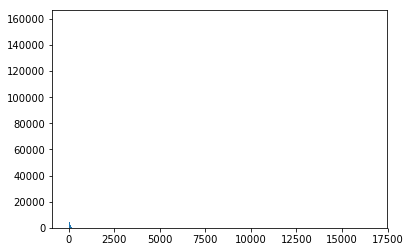

In [25]:
fig, ax = plt.subplots()
ax.hist(merged_data['time_diff'], bins=1000)
plt.show()

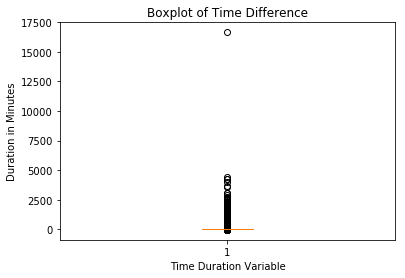

In [26]:
fig, ax = plt.subplots()
ax.boxplot(merged_data['time_diff'])
ax.set_title('Boxplot of Time Difference')
ax.set_ylabel('Duration in Minutes')
ax.set_xlabel('Time Duration Variable')
plt.show()

In [40]:
merged_data.to_csv('bikeshare_q4.csv')